#### Contents
    01. Notebook Set-Up
    02. Data Security
    03. Geographic Areas
        A. Region Flags
        B. Spending habits between the different US regions
    04. Low-activity Customers
##### ---Proceeding with only "High" activity customers---
    05. Stakeholder Key Questions
        A. Price Range Groups
        B. Department & Product Frequency
        C. Loyalty Analysis
        D. Region Analysis
        E. Age Analysis
        F. Demographic Analysis
        G. Customer Profiles
    06. Export

# 1. Set-Up

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# File pathway

path = r'/Users/Owner/Documents/Data Analytics/4 Python/08-2022 Instacart Basket Analysis'

In [3]:
# Import data set

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [4]:
# Merge in the dept dataframe

df = df_ords_prods_cust.merge(df_dept, on = 'department_id')

In [5]:
# Delete dataframes to reduce memory

del df_ords_prods_cust
del df_dept

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

In [7]:
# Data type correction to reduce memory

df['order_id'] = df['order_id'].astype('int32')
df['user_id'] = df['user_id'].astype('int32')
df['order_number'] = df['order_number'].astype('int8')
df['orders_day_of_week'] = df['orders_day_of_week'].astype('int8')
df['order_hour_of_day'] = df['order_hour_of_day'].astype('int8')
df['days_since_prior_order'] = df['days_since_prior_order'].astype('float16')
df['product_id'] = df['product_id'].astype('int32')
df['add_to_cart_order'] = df['add_to_cart_order'].astype('int8')
df['reordered'] = df['reordered'].astype('int8')
df['department_id'] = df['department_id'].astype('int8')
df['prices'] = df['prices'].astype('float16')
df['max_order'] = df['max_order'].astype('int8')
df['avg_price'] = df['avg_price'].astype('float16')
df['median_order_freq'] = df['median_order_freq'].astype('float16')
df['age'] = df['age'].astype('int8')
df['num_of_dependants'] = df['num_of_dependants'].astype('int8')
df['income'] = df['income'].astype('int32')

# 2. Data Security

In [8]:
# Removing PII data & unnecessary columns

df = df.drop(columns = ['first_name','last_name','aisle_id','_merge'])

In [9]:
df.shape

(32404859, 31)

# 3. Geographic Areas

## A. Region Flags

In [10]:
# Create list of regions

northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [11]:
# Create regional flags

df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'

In [12]:
# Check flags

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

#### 32,404,859 records labeled correctly

## B. Spending Habits in the different U.S. Regions

In [13]:
# Crosstab of region by spending flag

crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False)
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [14]:
# States per region

df.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

In [15]:
# Customers by region

df.groupby('region').agg({'user_id': ['nunique'], 'avg_price': ['mean']})

,user_id,avg_price
,nunique,mean
region,,
Midwest,48519,12.718750
Northeast,36388,11.554688
South,68737,12.195312
West,52565,11.320312


#### We can see that the South has more states, customers, and revenue than any other part of the country. On the other hand, customers in the Midwest spend the most on average per person.

# 4. Low-activity Customers

In [16]:
# Create customer activity flag

df.loc[df['max_order'] >= 5, 'activity'] = 'High'
df.loc[df['max_order'] < 5, 'activity'] = 'Low'

In [17]:
df['activity'].value_counts(dropna = False)

High    30964564
Low      1440295
Name: activity, dtype: int64

In [18]:
# Create dataset of low activity customers

df_inactive = df[df['activity'] == 'Low']

In [19]:
# Export the dataset of low activity customers

df_inactive.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'inactive_customers.pkl'))

In [20]:
# Create dataset of high activity customers

df_active = df[df['activity'] == 'High']

In [21]:
# Delete dataframes to reduce memory usage

del df_inactive
del df

In [22]:
df_active.shape

(30964564, 33)

In [23]:
df_active.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,num_of_dependants,marital_status,income,department,region,activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High
4,431534,1,5,4,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,High


### Continuting analysis with 'High' activity customers only (>5 orders)

# 5. Stakeholder Key Questions

## A. Price Range Groups

#### Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [24]:
# Create unique product dataset

unique_products = df_active.drop_duplicates(subset = 'product_name') 

In [25]:
unique_products['price_range_loc'].value_counts(dropna = False)

Mid-range product      32803
Low-range product      16280
High-range products      547
Name: price_range_loc, dtype: int64

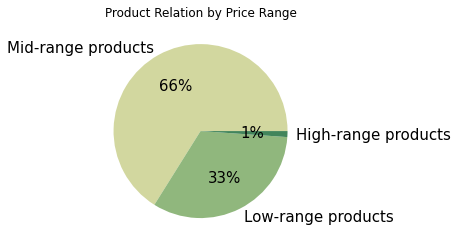

In [26]:
# Create pie chart for price range groups by price

# define data
unique_products = df_active.drop_duplicates(subset = 'product_name') 
data_price = unique_products['price_range_loc'].value_counts(dropna = False) 
labels_price = ['Mid-range products', 'Low-range products', 'High-range products']

# define Seaborn color palette to use
colors = ['#D2D79F', '#90B77D', '#42855B']

# create pie chart
price_pie, ax = plt.subplots()
plt.pie(data_price, labels = labels_price, colors = colors, autopct='%.0f%%', textprops={'fontsize': 15})
plt.title('Product Relation by Price Range')
plt.show()

In [27]:
# price range groups by orders

df_active['price_range_loc'].value_counts(dropna = False)

Mid-range product      20891771
Low-range product       9674840
High-range products      397953
Name: price_range_loc, dtype: int64

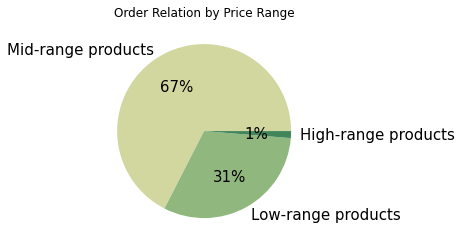

In [28]:
# Create pie chart for price range groups by orders

# define data
data_price = df_active['price_range_loc'].value_counts(dropna = False) 
labels_price = ['Mid-range products', 'Low-range products', 'High-range products']

# define Seaborn color palette to use
colors = ['#D2D79F', '#90B77D', '#42855B']

# create pie chart
order_pie, ax = plt.subplots()
plt.pie(data_price, labels = labels_price, colors = colors, autopct='%.0f%%', textprops={'fontsize': 15})
plt.title('Order Relation by Price Range')
plt.show()

In [29]:
# Export price group charts 

price_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_pie.png'))
order_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_pie.png'))

## B. Department & Product Frequency

#### Are there certain types of products that are more popular than others?

In [30]:
# Create subset of products

df_products = df_active.drop_duplicates(subset = 'product_name')

Text(0, 0.5, 'Product')

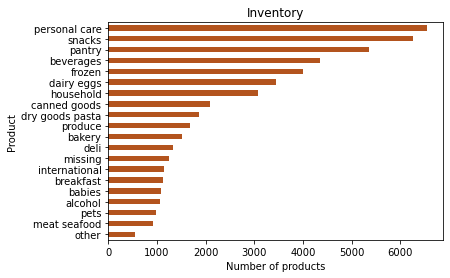

In [31]:
# Create popular product chart

bar_inventory = df_products['department'].value_counts().nlargest(20).sort_values().plot.barh(color=['#B3541E'])
plt.title('Inventory')
plt.xlabel('Number of products')
plt.ylabel('Product')

#### Which departments have the highest frequency of product orders?

Text(0, 0.5, 'Department')

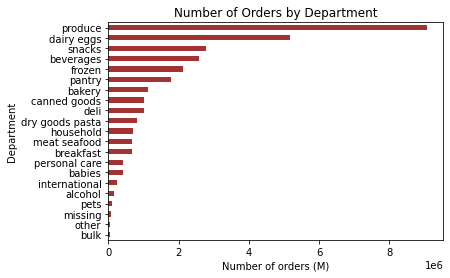

In [32]:
# Create chart of dept freq

bar_dept = df_active['department'].value_counts().sort_values().plot.barh(color=['#A13333'])
plt.title('Number of Orders by Department')
plt.xlabel('Number of orders (M)')
plt.ylabel('Department')

In [33]:
# Export Dept & Product charts 

bar_inventory.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_inventory.png'))
bar_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

## C. Loyalty Analysis

#### What’s the distribution among users in regards to their brand loyalty?

In [34]:
# Create subset of customers

df_customers = df_active.drop_duplicates(subset = 'user_id')

In [35]:
df_customers['loyalty_flag'].value_counts(dropna = False) 

Regular customer    76864
New customer        68750
Loyal customer      17017
Name: loyalty_flag, dtype: int64

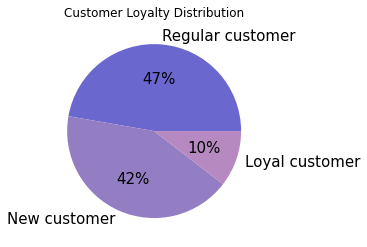

In [36]:
# Create pie chart for loyalty distribution

# define data
data_loyal = df_customers['loyalty_flag'].value_counts(dropna = False) 
labels_price = ['Regular customer', 'New customer', 'Loyal customer']

# define Seaborn color palette to use
colors = ['#6A67CE', '#947EC3', '#B689C0']

# create pie chart
loyal_pie, ax = plt.subplots()
plt.pie(data_loyal, labels = labels_price, colors = colors, autopct='%.0f%%', textprops={'fontsize': 15})
plt.title('Customer Loyalty Distribution')
plt.show()

In [37]:
# How often do customers return to Instacart

loyal_order_freq = df_customers.groupby(['loyalty_flag']).agg({'median_order_freq':['mean', 'min', 'max']})
loyal_order_freq

median_order_freq           
                              mean  min   max
loyalty_flag                                 
Loyal customer            5.304688  0.0  14.0
New customer             18.343750  0.0  30.0
Regular customer         11.546875  0.0  30.0

##### Are there differences in ordering habits based on a customer’s loyalty status (price)

loyal_price = df_active.groupby(['loyalty_flag']).agg({'price':['mean', 'min', 'max']})
loyal_price

In [38]:
# Are there differences in ordering habits based on a customer’s loyalty status (orders)

df_active['loyalty_flag'].value_counts(dropna = False) 

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

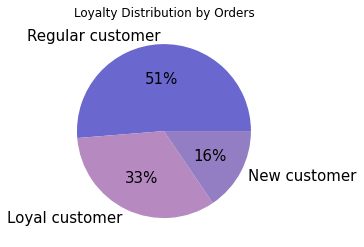

In [39]:
# Create pie chart for loyalty orders

# define data
data_loyal_order = df_active['loyalty_flag'].value_counts(dropna = False) 
labels_price = ['Regular customer', 'Loyal customer', 'New customer']

# define Seaborn color palette to use
colors = ['#6A67CE', '#B689C0', '#947EC3']

# create pie chart
loyal_order_pie, ax = plt.subplots()
plt.pie(data_loyal_order, labels = labels_price, colors = colors, autopct='%.0f%%', textprops={'fontsize': 15})
plt.title('Loyalty Distribution by Orders')
plt.show()

In [40]:
# Are there differences in ordering habits based on a customer’s loyalty status (price range groups)

loyalty_price_range = pd.crosstab(df_active['loyalty_flag'], df_active['price_range_loc'], dropna = False)
loyalty_price_range_prop = pd.crosstab(df_active['loyalty_flag'], df_active['price_range_loc'], normalize = 'index')
loyalty_price_range

price_range_loc,High-range products,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


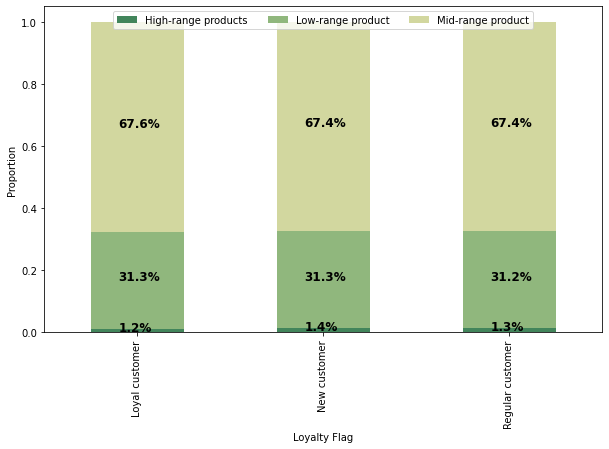

In [41]:
# Create bar chart for loyalty price range groups

bar_loyalty_product_range = loyalty_price_range_prop.plot(kind='bar', 
                    stacked=True, 
                    color = ['#42855B', '#90B77D', '#D2D79F'], 
                    figsize=(10, 6))

plt.legend(loc="upper center", ncol=3)
plt.xlabel("Loyalty Flag")
plt.ylabel("Proportion")

for n, x in enumerate([*loyalty_price_range.index.values]):
    for (proportion, y_loc) in zip(loyalty_price_range_prop.loc[x],
                                   loyalty_price_range_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [42]:
# Export loyalty charts 

loyal_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_pie.png'))
loyal_order_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_order_pie.png'))
bar_loyalty_product_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_price_group_bar.png'))

## D. Region Analysis

#### Are there differences in ordering habits based on a customer’s region?

Text(0, 0.5, 'Region')

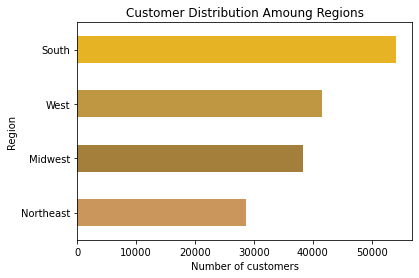

In [43]:
# Customers per region

bar_region_users = df_customers['region'].value_counts().sort_values().plot.barh(color=['#CA965C', '#A47E3B', '#BF9742', '#E6B325'])
plt.title('Customer Distribution Amoung Regions')
plt.xlabel('Number of customers')
plt.ylabel('Region')

In [44]:
# Are there differences in ordering habits based on a customer’s region (departments)

region_dept = pd.crosstab(df_active['department'], df_active['region'], dropna = False)
region_dept_prop = pd.crosstab(df_active['department'], df_active['region'], normalize = 'index')
region_dept

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


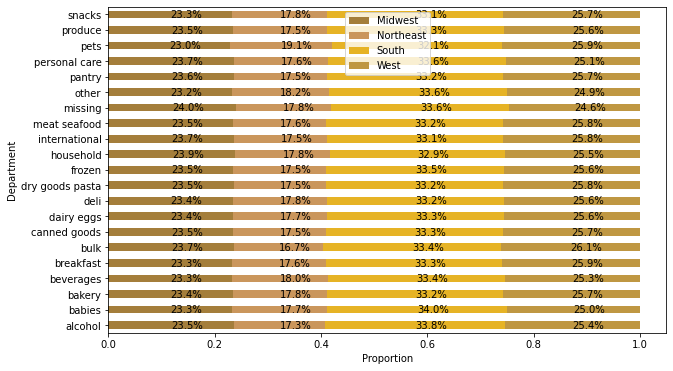

In [45]:
# Create bar chart for regional department groups

bar_region_dept = region_dept_prop.plot(kind='barh', 
                    stacked=True, 
                    color = ['#A47E3B', '#CA965C', '#E6B325', '#BF9742'], 
                    figsize=(10, 6))

plt.legend(loc="upper center")
plt.xlabel("Proportion")
plt.ylabel("Department")

for n, x in enumerate([*region_dept.index.values]):
    for (proportion, y_loc) in zip(region_dept_prop.loc[x],
                                   region_dept_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.2,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10)

plt.show()

In [46]:
# Are there differences in ordering habits based on a customer’s region (price)

loyal_price = df_active.groupby(['region']).agg({'median_order_freq':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
loyal_price

median_order_freq               prices           
                       mean  min   max      mean  min   max
region                                                     
Midwest           10.023438  0.0  30.0  7.792969  1.0  25.0
Northeast          9.921875  0.0  30.0  7.781250  1.0  25.0
South              9.953125  0.0  30.0  7.792969  1.0  25.0
West               9.921875  0.0  30.0  7.789062  1.0  25.0

In [47]:
# Export region charts 

bar_region_users.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar.png'))
bar_region_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dept_bar.png'))

## E. Age Analysis

#### # Is there a connection between age in terms of ordering habits?

In [48]:
# Create Age Profile

df_active['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [49]:
# Create age flags for young adult:18-29 years, middle-aged adult: 30-49 years, older adults:50-64 years, elderly: 65+

df_active.loc[df_active['age'] < 30, 'age_group'] = 'young'
df_active.loc[(df_active['age'] >= 30) & (df_active['age'] <= 49), 'age_group'] = 'middle'
df_active.loc[(df_active['age'] >= 50) & (df_active['age'] <= 64), 'age_group'] = 'older'
df_active.loc[df_active['age'] > 64, 'age_group'] = 'elderly'

In [50]:
df_unique_age = df_active.drop_duplicates(subset = 'user_id')

Text(0, 0.5, 'Number of customers')

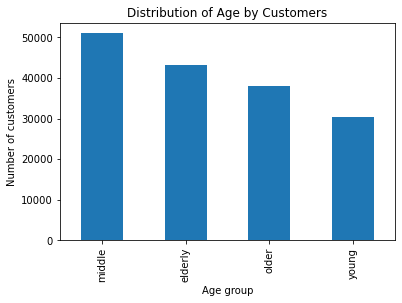

In [51]:
# Create bar chart for age distribution of users

bar_age = df_unique_age['age_group'].value_counts().plot.bar()
plt.title('Distribution of Age by Customers')
plt.xlabel('Age group')
plt.ylabel('Number of customers')

In [52]:
#Aggregate age-profile

df_active.groupby(['age_group']).agg({'median_order_freq':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_order_freq               prices           
                       mean  min   max      mean  min   max
age_group                                                  
elderly            9.929688  0.0  30.0  7.796875  1.0  25.0
middle             9.953125  0.0  30.0  7.792969  1.0  25.0
older             10.000000  0.0  30.0  7.785156  1.0  25.0
young              9.945312  0.0  30.0  7.781250  1.0  25.0

In [53]:
# Age by order time

age_time = pd.crosstab(df_active['order_hour_of_day'], df_active['age_group'])
age_time = age_time.reindex(['young', 'middle', 'older', 'elderly'], axis = "columns")
age_time

age_group,young,middle,older,elderly
order_hour_of_day,,,,
0,39615,67399,47633,53395
1,21083,35282,24568,28688
2,12881,21204,14148,17458
3,9386,15328,10687,13395
4,9810,15018,12255,13680
5,16440,25076,19616,23286
6,55119,86279,64386,75229
7,163303,261898,204945,233067
8,308687,521368,387597,441458


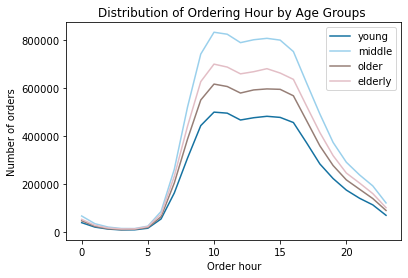

In [54]:
# Create linechart of order time by age groups

line_age_time = age_time.plot(kind='line', color=['#1572A1', '#9AD0EC','#967E76', '#E3BEC6'])
plt.title('Distribution of Ordering Hour by Age Groups ')
plt.xlabel('Order hour')
plt.ylabel('Number of orders')
plt.legend()

In [55]:
# Age by order day

age_day = pd.crosstab(df_active['orders_day_of_week'], df_active['age_group'])
age_day = age_day.reindex(['young', 'middle', 'older', 'elderly'], axis = "columns")
age_day

age_group,young,middle,older,elderly
orders_day_of_week,,,,
0,1111151,1859033,1372182,1566244
1,1020744,1708943,1264504,1417495
2,752382,1262440,944714,1065170
3,684350,1153652,853183,978350
4,680343,1144591,843899,956161
5,759909,1266212,941493,1066115
6,808724,1335815,1000756,1146009


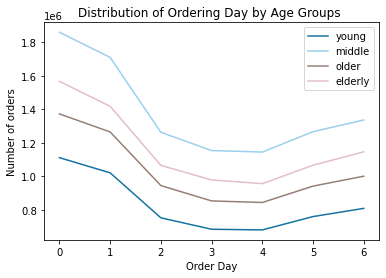

In [56]:
# Create linechart of order time by age groups

line_age_day = age_day.plot(kind='line', color=['#1572A1', '#9AD0EC','#967E76', '#E3BEC6'])
plt.title('Distribution of Ordering Day by Age Groups ')
plt.xlabel('Order Day')
plt.ylabel('Number of orders')
plt.legend()

In [57]:
# Export age charts 

bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))
line_age_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_time_line.png'))
line_age_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_day_line.png'))

## F. Demographic Analysis

#### What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

Text(0, 0.5, 'Number of customers')

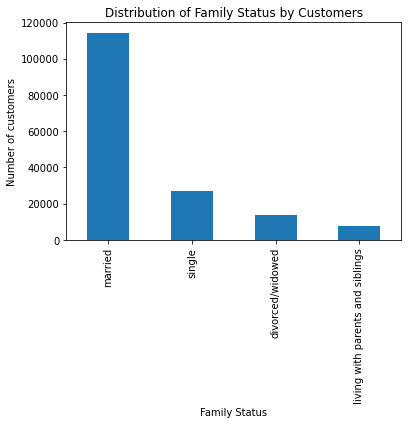

In [58]:
bar_family1 = df_customers['marital_status'].value_counts().plot.bar()
plt.title('Distribution of Family Status by Customers')
plt.xlabel('Family Status')
plt.ylabel('Number of customers')

In [59]:
# marital status by gender

family_type = pd.crosstab(df_customers['marital_status'], df_customers['gender'], dropna = False)
family_type_prop = pd.crosstab(df_customers['marital_status'], df_customers['gender'], normalize = 'index')
family_type

gender,Female,Male
marital_status,,
divorced/widowed,6892,6939
living with parents and siblings,3764,3844
married,56668,57628
single,13309,13587


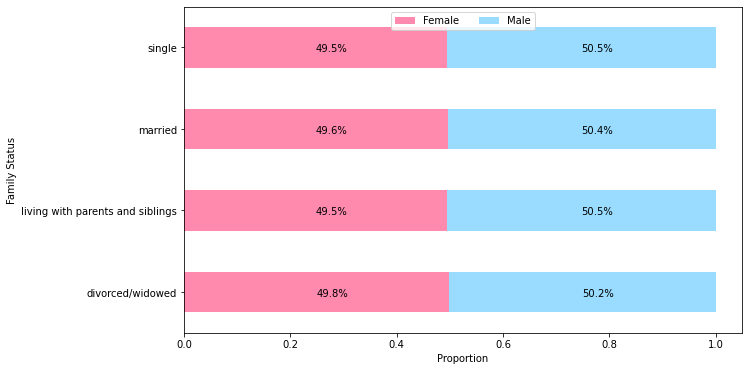

In [60]:
# Create bar of marital status by gender

bar_family = family_type_prop.plot(kind='barh', 
                    stacked=True, 
                    color = ['#FF8AAE', '#9ADCFF'], 
                    figsize=(10, 6))

plt.legend(loc="upper center", ncol=2)
plt.xlabel("Proportion")
plt.ylabel("Family Status")

for n, x in enumerate([*family_type.index.values]):
    for (proportion, y_loc) in zip(family_type_prop.loc[x],
                                   family_type_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.05,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10)

plt.show()

In [61]:
#Aggregate marital status

df_active.groupby(['marital_status']).agg({'median_order_freq':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_order_freq               prices       \
                                              mean  min   max      mean  min   
marital_status                                                                 
divorced/widowed                          9.875000  0.0  30.0  7.800781  1.0   
living with parents and siblings          9.867188  0.0  30.0  7.800781  1.0   
married                                   9.968750  0.0  30.0  7.789062  1.0   
single                                    9.968750  0.0  30.0  7.785156  1.0   

                                        
                                   max  
marital_status                          
divorced/widowed                  25.0  
living with parents and siblings  25.0  
married                           25.0  
single                            25.0

In [62]:
# Create flags for income: Low: <55,000, Middle: 55,000-155,000, High: >155,000

df_active.loc[df_active['income'] < 55000, 'income_group'] = 'low'
df_active.loc[(df_active['income'] >= 55000) & (df_active['income'] <= 155000), 'income_group'] = 'middle'
df_active.loc[df_active['income'] > 155000, 'income_group'] = 'high'

In [63]:
df_active['income_group'].value_counts(dropna = False) 

middle    23488182
low        4452388
high       3023994
Name: income_group, dtype: int64

In [64]:
#Aggregate income status

df_active.groupby(['income_group']).agg({'median_order_freq':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_order_freq               prices           
                          mean  min   max      mean  min   max
income_group                                                  
high                  9.781250  0.0  30.0  7.937500  1.0  25.0
low                  10.429688  0.0  30.0  6.914062  1.0  25.0
middle                9.890625  0.0  30.0  7.937500  1.0  25.0

In [65]:
# Export demographic charts 

bar_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_bar.png'))
bar_family1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_bar1.png'))

## G. Customer Profiles

#### What differences can you find in ordering habits of different customer profiles? 

In [66]:
# Create baby profile

df_active['baby_status'] = [1 if x == 'babies' else 0 for x in df_active['department']]
df_active['baby_status'] = df_active.groupby(['user_id'])['baby_status'].transform(np.max)
df_active['baby_status'].value_counts(dropna=False)

0    21154311
1     9810253
Name: baby_status, dtype: int64

In [67]:
df_active['baby_status'] = df_active['baby_status'].astype('int8')

In [68]:
#Aggregate baby status

df_baby = df_active.groupby(['baby_status']).agg({'median_order_freq':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
df_baby.loc[0:1,'baby_status'] = ['No baby', 'Has bought baby products']
df_baby

median_order_freq               prices             \
                         mean  min   max      mean  min   max   
baby_status                                                     
0                   10.734375  0.0  30.0  7.769531  1.0  25.0   
1                    8.289062  0.0  30.0  7.832031  1.0  25.0   

                          baby_status  
                                       
baby_status                            
0                             No baby  
1            Has bought baby products

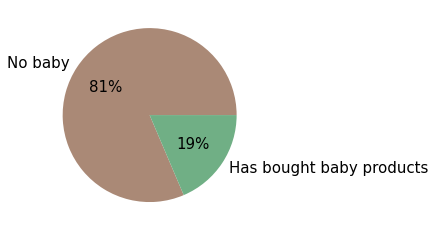

In [69]:
# Create pie chart for baby profile

# define data
unique_baby = df_active.drop_duplicates(subset = 'user_id') 
data_baby = unique_baby['baby_status'].value_counts(dropna = False) 
labels_baby = ['No baby', 'Has bought baby products']

# define Seaborn color palette to use
colors = ['#AA8976', '#70AF85']

# create pie chart
baby_pie, ax = plt.subplots()
plt.pie(data_baby, labels = labels_baby, colors = colors, autopct='%.0f%%', textprops={'fontsize': 15})
plt.show()

In [70]:
# Create alcohol profile

df_active['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_active['department']]
df_active['alcohol_status'] = df_active.groupby(['user_id'])['alcohol_status'].transform(np.max)
df_active['alcohol_status'].value_counts(dropna=False)

0    28634074
1     2330490
Name: alcohol_status, dtype: int64

In [71]:
df_active['alcohol_status'] = df_active['alcohol_status'].astype('int8')

In [72]:
#Aggregate alcohol status

df_alcohol = df_active.groupby(['alcohol_status']).agg({'median_order_freq':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
df_alcohol.loc[0:1,'alcohol_status'] = ['No alcohol', 'Has bought alcohol products']
df_alcohol

median_order_freq               prices             \
                            mean  min   max      mean  min   max   
alcohol_status                                                     
0                       9.976562  0.0  30.0  7.792969  1.0  25.0   
1                       9.710938  0.0  30.0  7.781250  1.0  25.0   

                             alcohol_status  
                                             
alcohol_status                               
0                                No alcohol  
1               Has bought alcohol products

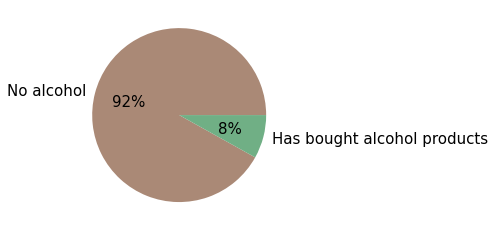

In [73]:
# Create pie chart for alcohol profile

# define data
unique_alcohol = df_active.drop_duplicates(subset = 'user_id') 
data_alcohol = unique_alcohol['alcohol_status'].value_counts(dropna = False) 
labels_alcohol = ['No alcohol', 'Has bought alcohol products']

# define Seaborn color palette to use
colors = ['#AA8976', '#70AF85']

# create pie chart
alcohol_pie, ax = plt.subplots()
plt.pie(data_alcohol, labels = labels_alcohol, colors = colors, autopct='%.0f%%', textprops={'fontsize': 15})
plt.show()

In [74]:
# Create pet profile

df_active['pet_status'] = [1 if x == 'pets' else 0 for x in df_active['department']]
df_active['pet_status'] = df_active.groupby(['user_id'])['pet_status'].transform(np.max)
df_active['pet_status'].value_counts(dropna=False)

0    27513213
1     3451351
Name: pet_status, dtype: int64

In [75]:
df_active['pet_status'] = df_active['pet_status'].astype('int8')

In [76]:
#Aggregate pet status

df_pets = df_active.groupby(['pet_status']).agg({'median_order_freq':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})
df_pets.loc[0:1,'pet_status'] = ['No pets', 'Has bought pet products']
df_pets

median_order_freq               prices             \
                        mean  min   max      mean  min   max   
pet_status                                                     
0                  10.054688  0.0  30.0  7.789062  1.0  25.0   
1                   9.195312  0.0  30.0  7.812500  1.0  25.0   

                         pet_status  
                                     
pet_status                           
0                           No pets  
1           Has bought pet products

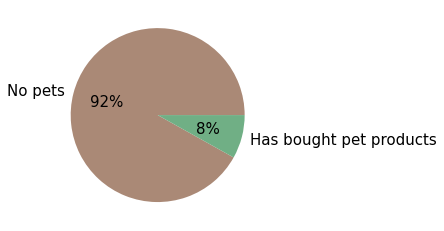

In [77]:
# Create pie chart for pet profile

# define data
unique_pets = df_active.drop_duplicates(subset = 'user_id') 
data_pets = unique_pets['pet_status'].value_counts(dropna = False) 
labels_pets = ['No pets', 'Has bought pet products']

# define Seaborn color palette to use
colors = ['#AA8976', '#70AF85']

# create pie chart
pet_pie, ax = plt.subplots()
plt.pie(data_pets, labels = labels_pets, colors = colors, autopct='%.0f%%', textprops={'fontsize': 15})
plt.show()

In [78]:
# Export profile charts 

baby_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'baby_pie.png'))
alcohol_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_pie.png'))
pet_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_pie.png'))

# 6. Export

In [79]:
# Export the dataset of high activity customers

df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))